In [53]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score

In [54]:
#Load dataset
df = pd.read_csv("heart.csv")

In [55]:
#tell the type of dataset
type(df)

pandas.core.frame.DataFrame

In [56]:
#no of rows and columns
df.shape

(270, 14)

In [57]:
#getting info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

<b>age</b> ------ age in years <br>
<b>sex</b> ------ 1 = male, 0 = female<br>
<b>cp</b>  ------- chest pain type (value 1: typical type 1 angina, value 2: typical type angina,------------ value 3: non-angina pain; value 4: asymptomatic)<br>
<b>BP</b> ----- resting blood pressure (in mm Hg on admission to the hospital)<br>
<b>Cholesterol</b> ----- serum cholestoral in mg/dl<br>
<b>fbs ------</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
<b>ekg results</b> -- resting electrocardiographic result<br>
<b>max HR</b> ------ maximum heart rate achieved<br>
<b>exercise angina</b> ---- exercise induced angina (1 = yes; 0 = no)<br>
<b>ST depression</b> ---- ST depression induced by exercise relative to rest<br>
<b>slope of ST</b> ---- the slope of the peak exercise ST segment<br>
<b>no. of vessels</b> ------- number of major vessels (0-3) colored by flourosopy<br>
<b>Thallium </b>---- (value 3: normal; value 6: fixed defect; value 7:reversible defect)




In [58]:
#for first 5 rows
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [59]:
#for last 5 rows
df.tail()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  
265                        0         7       Absence  
266                        0         7       Absence  
267                        0         3       Absence  
268                        0         6       Absence  
269                        3         3      Presence

In [60]:
##feature engineering
#To get null values of column
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<Axes: >

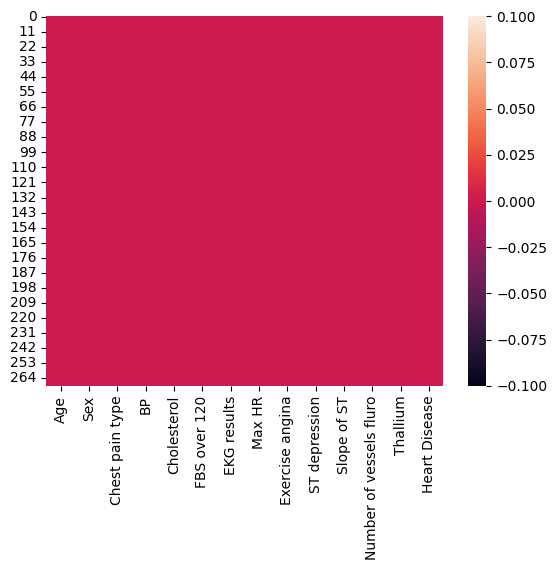

In [61]:
#heatmap to show null values
sns.heatmap(df.isnull())
#as dataset don't have any null value so it is showing the red colour which is 0.0 according to scale

In [62]:
#Show the datatype of features
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [63]:
#No. of counts of Presence and Absence
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

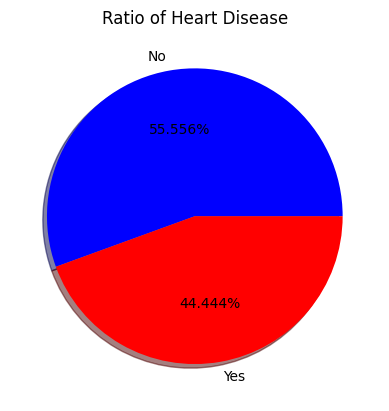

In [64]:
#To show the presence and absence of Heart disease using pie chart
plt.pie(x = df['Heart Disease'].value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['blue', 'red'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()


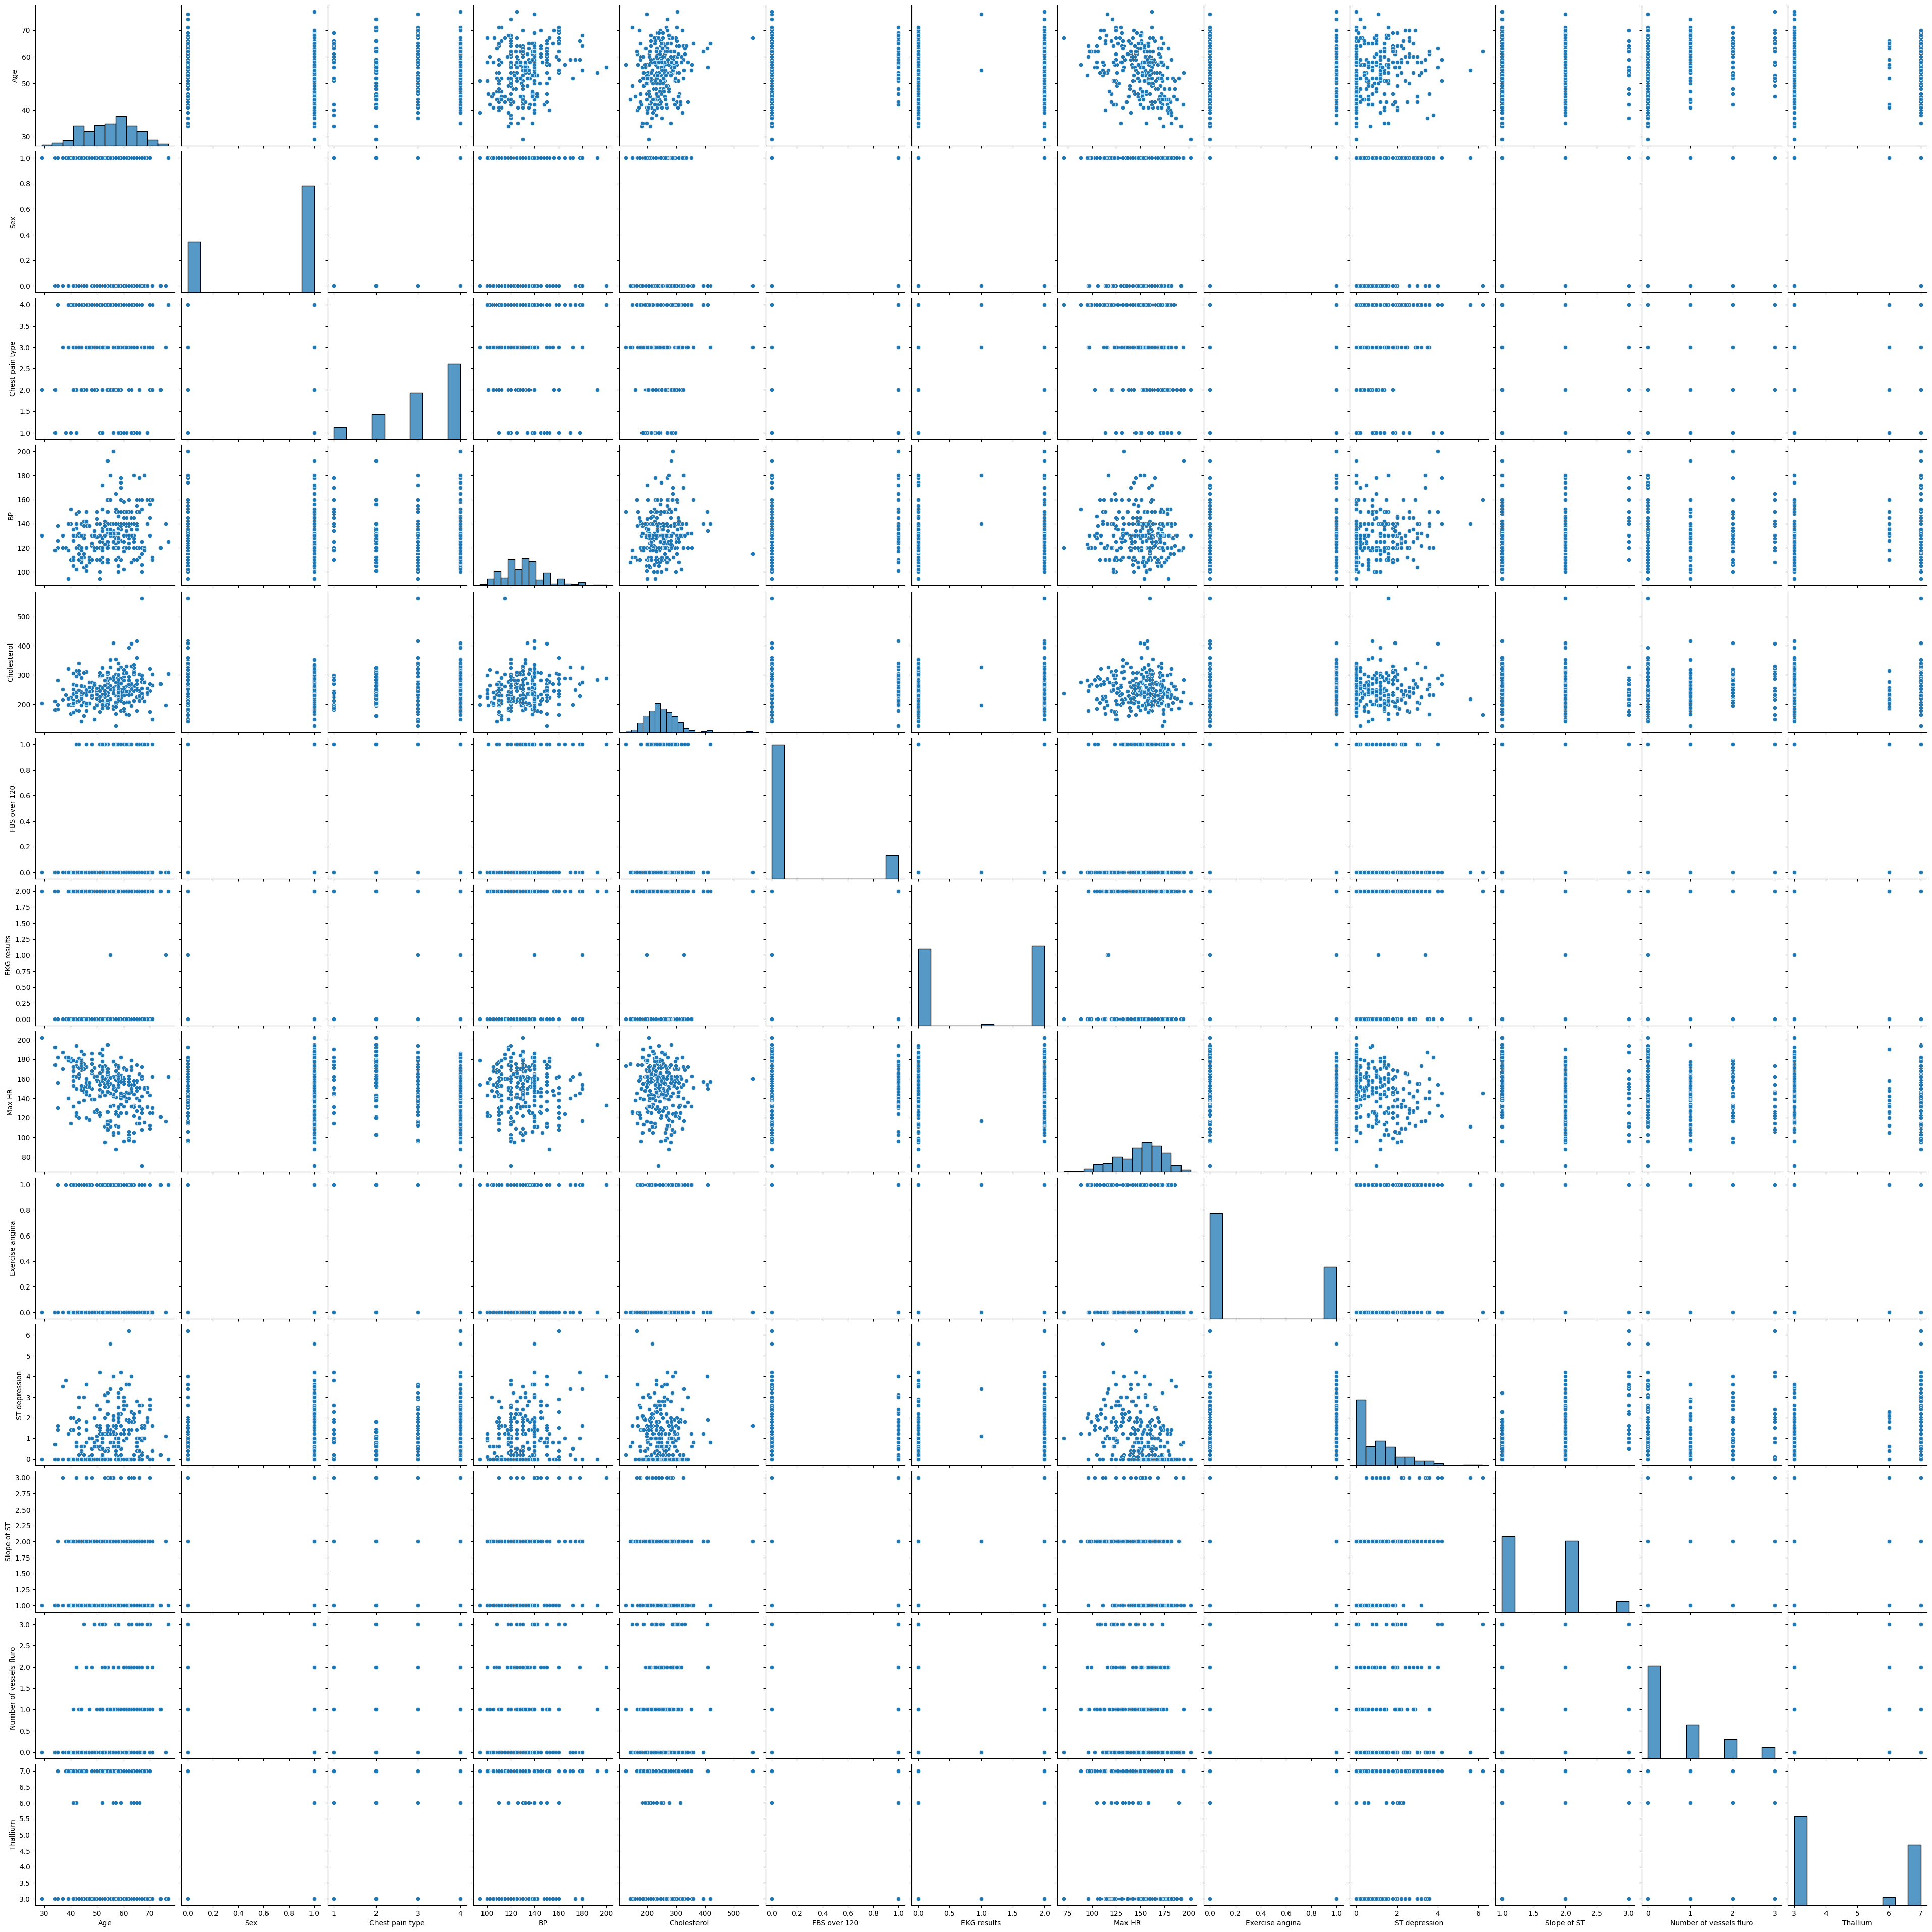

In [65]:
#visualisation of relationships between variables within a dataset
sns.pairplot(df.drop(columns='Heart Disease') , height=3,aspect=1)

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Chest pain type'}>,
        <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FBS over 120'}>,
        <Axes: title={'center': 'EKG results'}>,
        <Axes: title={'center': 'Max HR'}>],
       [<Axes: title={'center': 'Exercise angina'}>,
        <Axes: title={'center': 'ST depression'}>,
        <Axes: title={'center': 'Slope of ST'}>,
        <Axes: title={'center': 'Number of vessels fluro'}>],
       [<Axes: title={'center': 'Thallium'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

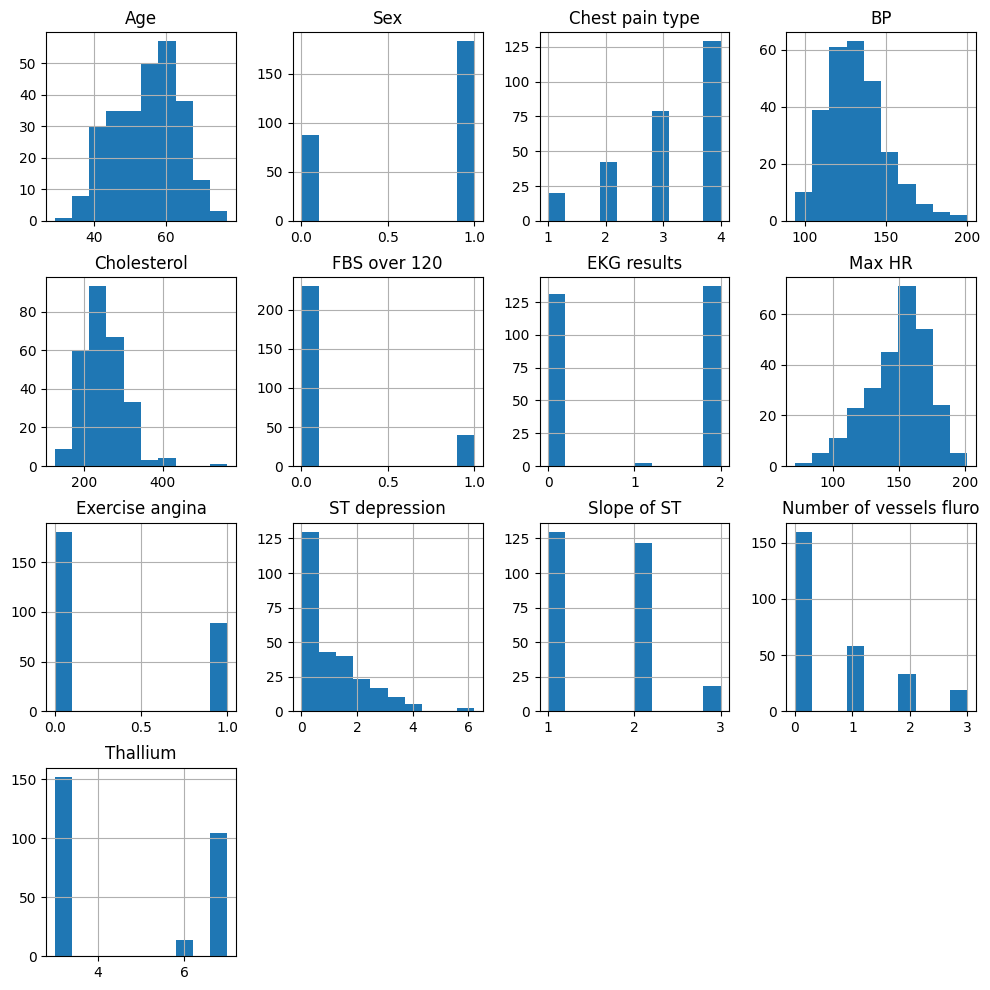

In [66]:
#to visualize the feature using histogram
df.hist(figsize=(12,12))

<Axes: xlabel='Age', ylabel='Heart Disease'>

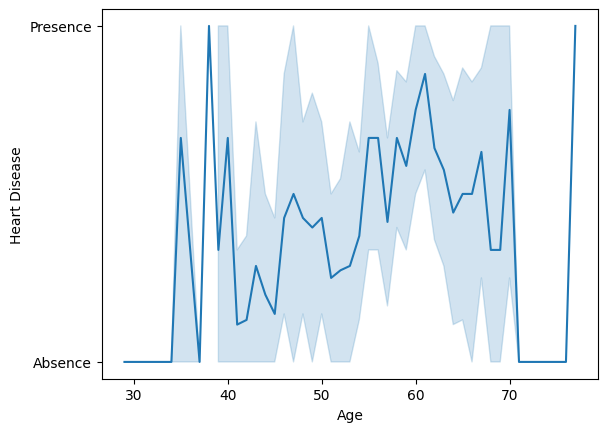

In [67]:
#Line graph for heart disease vs age
sns.lineplot(data=df,x='Age',y='Heart Disease')

<Axes: xlabel='Thallium', ylabel='count'>

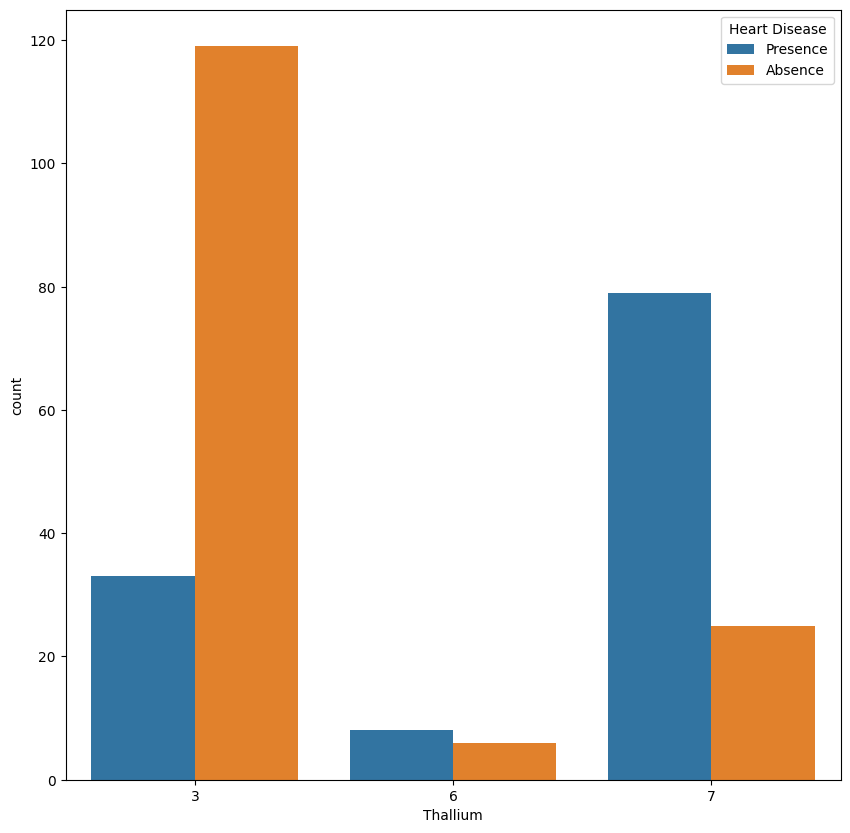

In [68]:
#count graph for heart disease vs Thallium
plt.figure(figsize=(10,10))
sns.countplot(data=df,hue='Heart Disease',x='Thallium')

In [69]:
#statistical measures about the data
df.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

Training and testing

In [70]:
X = df.iloc[:, :-1]
y = df["Heart Disease"]

In [71]:
#Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=8)

In [72]:
#Shape/Dimension of Train-test data
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (216, 13)
Shape of y_train (216,)
Shape of X_test (54, 13)
Shape of y_test (54,)


In [73]:
# Encoding the target value into numerical
# value using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Heart Disease"] = encoder.fit_transform(df["Heart Disease"])

In [74]:
df["Heart Disease"]

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int32

<Axes: >

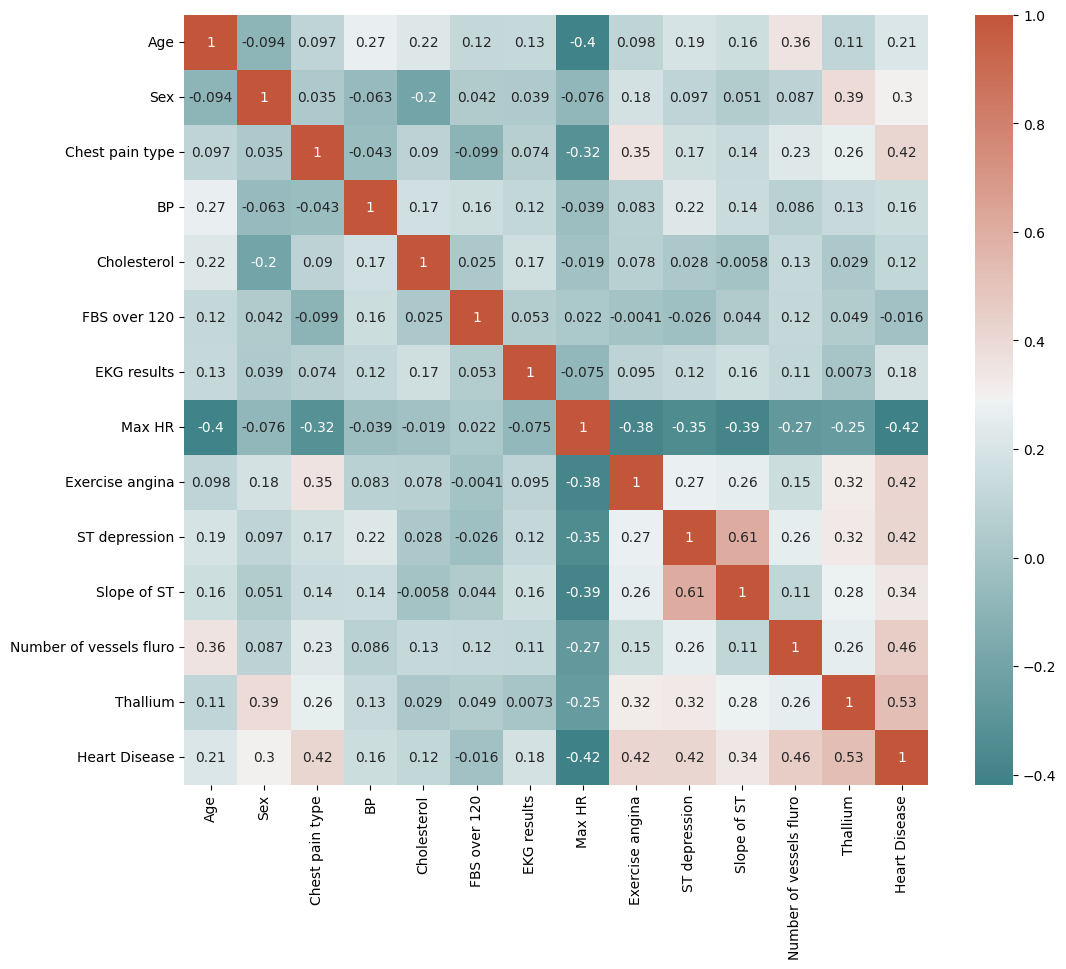

In [75]:
#correlation matrix
#it is to find the dependency of column to target value
corr = df.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

Decision Tree

Decision Tree
ACCURACY score on train data 93.98148148148148
Accuracy Score on test data 72.22222222222221
Classification Report
               precision    recall  f1-score   support

     Absence       0.71      0.87      0.78        31
    Presence       0.75      0.52      0.62        23

    accuracy                           0.72        54
   macro avg       0.73      0.70      0.70        54
weighted avg       0.73      0.72      0.71        54
 

Confusion Matrix
 [[27  4]
 [11 12]]


<Axes: >

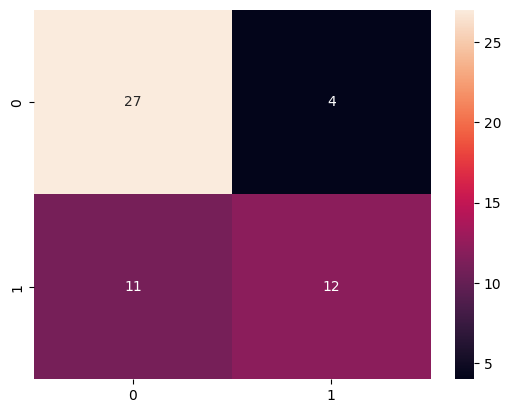

In [136]:
print("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier( max_depth=5)
dtree.fit(X_train, y_train)
pred_tree=dtree.predict(X_test)
acc=accuracy_score(y_test,pred_tree)
#print("Acurray on test set: {:.2f}%".format(acc*100))
print("ACCURACY score on train data",accuracy_score(y_train, dtree.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred_tree)*100)
print("Classification Report\n",classification_report(y_test,pred_tree),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred_tree))
sns.heatmap(confusion_matrix(y_test,pred_tree),annot=True,fmt='d')

In [77]:
#to find the best score of KNN - to get best value of k
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,40):
  knnn=KNeighborsClassifier(n_neighbors=k)
  knnn.fit(X_train,y_train)
  knn_scores.append(knnn.score(X_test,y_test))

print(f'Best choice of k: {np.argmax(knn_scores)+1}')


Best choice of k: 3


KNN

KNN
ACCURACY score on train data 81.01851851851852
Accuracy Score on test data 70.37037037037037
Classification Report
               precision    recall  f1-score   support

     Absence       0.71      0.81      0.76        31
    Presence       0.68      0.57      0.62        23

    accuracy                           0.70        54
   macro avg       0.70      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54
 

Confusion Matrix
 [[25  6]
 [10 13]]


<Axes: >

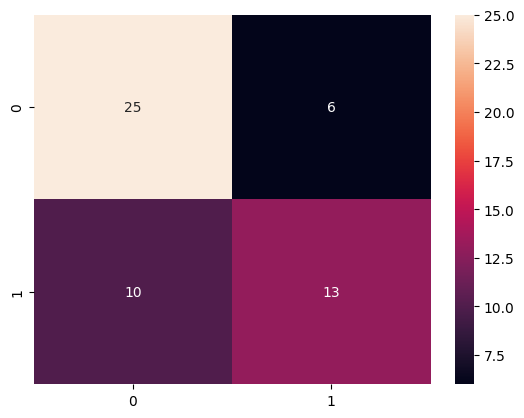

In [134]:
print("KNN")
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
pred_k=KNN.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, KNN.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred_k)*100)
print("Classification Report\n",classification_report(y_test,pred_k),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred_k))
sns.heatmap(confusion_matrix(y_test,pred_k),annot=True,fmt='d')


Naive Bayes

Naive Bayes
ACCURACY score on train data 86.11111111111111
ACCURACY on test data 81.48148148148148
Classification Report
               precision    recall  f1-score   support

     Absence       0.82      0.87      0.84        31
    Presence       0.81      0.74      0.77        23

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54
 

Confusion Matrix [[27  4]
 [ 6 17]]


<Axes: >

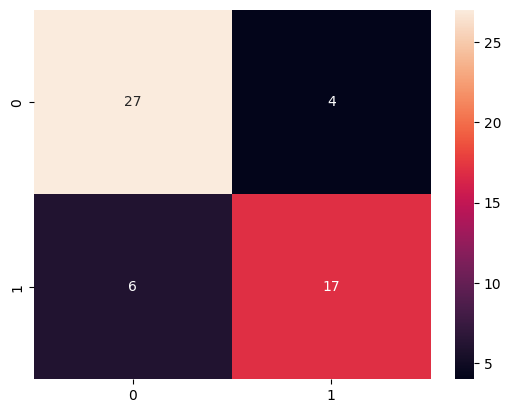

In [79]:
print("Naive Bayes")
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred_nb = nb_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, nb_model.predict(X_train))*100)
print("ACCURACY on test data",accuracy_score(y_test, pred_nb)*100)
print("Classification Report\n",classification_report(y_test,pred_nb),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred_nb))
sns.heatmap(confusion_matrix(y_test,pred_nb),annot=True,fmt='d')

Logistic Regression

Logistic Regression
ACCURACY score on train data 87.5
Accuracy Score on test data 77.77777777777779
Classification Report
               precision    recall  f1-score   support

     Absence       0.77      0.87      0.82        31
    Presence       0.79      0.65      0.71        23

    accuracy                           0.78        54
   macro avg       0.78      0.76      0.77        54
weighted avg       0.78      0.78      0.77        54
 

Confusion Matrix [[27  4]
 [ 8 15]]


<Axes: >

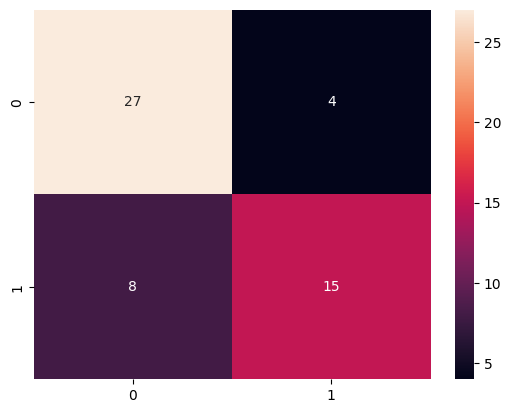

In [80]:
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
#training the logistic regression model with training data
lr_model.fit(X_train,y_train)
pred_lr = lr_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, lr_model.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred_lr)*100)
print("Classification Report\n",classification_report(y_test,pred_lr),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred_lr))
sns.heatmap(confusion_matrix(y_test,pred_lr),annot=True,fmt='d')

In [81]:
#to get best n_estimators for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_g={
    'n_estimators': range(1,1000,100),
}
rf=RandomForestClassifier()
rf_ran = RandomizedSearchCV(param_distributions=rf_g,estimator=rf,scoring="accuracy",verbose=0,n_iter=100,cv=4)
rf_ran.fit(X_train,y_train)
best_params=rf_ran.best_params_
print(best_params)

{'n_estimators': 501}


Random Forest classifier

Random Forest Classification
ACCURACY score on train data 100.0
Accuracy Score on test data 81.48148148148148
Classification Report
               precision    recall  f1-score   support

     Absence       0.80      0.90      0.85        31
    Presence       0.84      0.70      0.76        23

    accuracy                           0.81        54
   macro avg       0.82      0.80      0.81        54
weighted avg       0.82      0.81      0.81        54
 

Confusion Matrix [[28  3]
 [ 7 16]]


<Axes: >

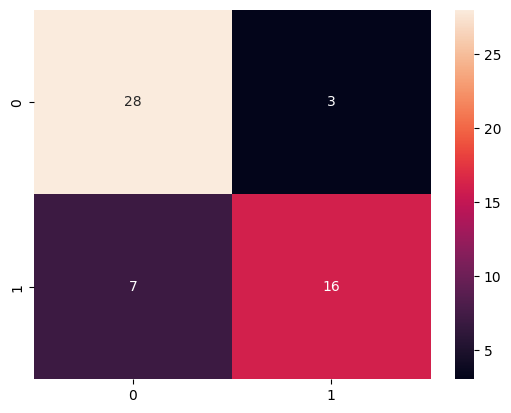

In [137]:
print("Random Forest Classification")
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
pred_rf = rf_classifier.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, rf_classifier.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred_rf)*100)
print("Classification Report\n",classification_report(y_test,pred_rf),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred_rf))
sns.heatmap(confusion_matrix(y_test,pred_rf),annot=True,fmt='d')

In [83]:
#to get best kernel for svm
from sklearn import svm
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

In [84]:
print(kernels, svc_scores)

['linear', 'poly', 'rbf', 'sigmoid'] [0.7592592592592593, 0.6851851851851852, 0.5925925925925926, 0.5740740740740741]


SVM

SVM
ACCURACY score on train data 88.42592592592592
Accuracy Score on test data 75.92592592592592
Classification Report
               precision    recall  f1-score   support

     Absence       0.75      0.87      0.81        31
    Presence       0.78      0.61      0.68        23

    accuracy                           0.76        54
   macro avg       0.76      0.74      0.74        54
weighted avg       0.76      0.76      0.75        54
 

Confusion Matrix [[27  4]
 [ 9 14]]


<Axes: >

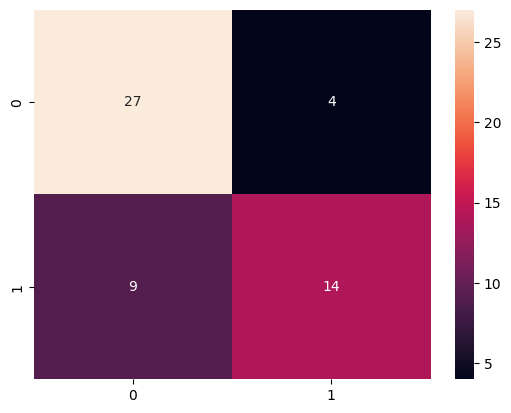

In [139]:
print("SVM")
from sklearn import svm
sup = svm.SVC(kernel='linear')
sup.fit(X_train,y_train)
pred_sv = sup.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, sup.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred_sv)*100)
print("Classification Report\n",classification_report(y_test,pred_sv),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred_sv))
sns.heatmap(confusion_matrix(y_test,pred_sv),annot=True,fmt='d')

In [140]:
#All Model Accuracy with Visual------6 models
Algo=[dtree,KNN,nb_model,lr_model,rf_classifier,sup]
Scores=[]
for K in Algo:
  K.fit(X_train,y_train)
  Scores.append(K.score(X_test,y_test)*100)
Algo=["Decision Tree","K Neighbors","Naive Bayes","Logistic Regression","Random Forest","SVM"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

Algorithms   Accuracy
0        Decision Tree  74.074074
1          K Neighbors  70.370370
2          Naive Bayes  81.481481
3  Logistic Regression  77.777778
4        Random Forest  81.481481
5                  SVM  75.925926

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'Naive Bayes'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'SVM')])

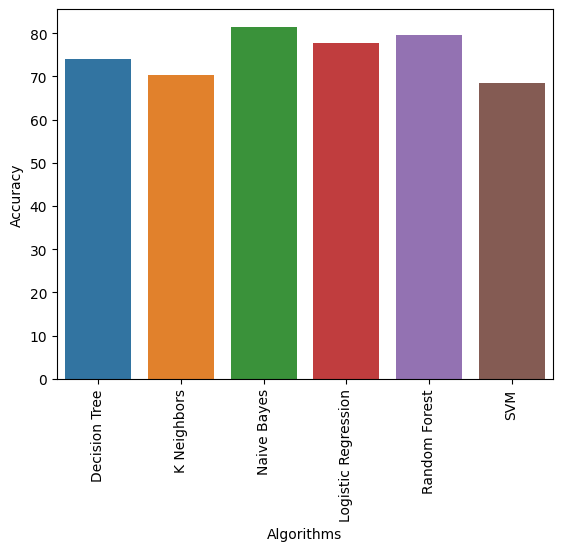

In [87]:
#Graph to show accuracy of the models
sns.barplot(x='Algorithms',y='Accuracy',data=Table)
plt.xticks(rotation=90) 

In [146]:
#Taking input and predict
a=rf_classifier.predict([[70,1,2,210,540,2 ,4,140,0,3.2,2,0,7]])
if a==1:
    print ("presence of heart disease")

else:
    print ("absence of heart disease")

absence of heart disease


In [142]:
#Taking input and predict
a=rf_classifier.predict([[67,1,4,160,286,0,2,108,1,1.5,2,3,3]])
if a==1:
    print ("presence of heart disease")

else:
    print ("absence of heart disease")

absence of heart disease


In [92]:
# Creating a pickle file for the classifier
import pickle
filename = 'heart-model.pkl'
pickle.dump(nb_model, open(filename, 'wb'))

Applying Explainable AI


In [93]:
import shap

In [94]:
explainer = shap.KernelExplainer(dtree.predict_proba, shap.sample(X_train, 400))

Using 216 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [95]:
shap_values = explainer.shap_values(X_test.iloc[:500])

  0%|          | 0/54 [00:00<?, ?it/s]

100%|██████████| 54/54 [00:56<00:00,  1.05s/it]


In [96]:
for i in range(50):
  if(y_test.iloc[i] == 0 and pred_tree[i] == 0):
    print(i, end = " ")

In [97]:
shap_values[0][26]

array([-2.45227215e-02, -1.22414619e-01, -2.41110239e-01, -3.86899090e-03,
        2.70377582e-02,  9.54897305e-05,  8.00217151e-04, -8.70811850e-04,
       -7.40310635e-03,  4.14983078e-02, -1.10700712e-03, -2.89000365e-01,
        6.99401618e-02])

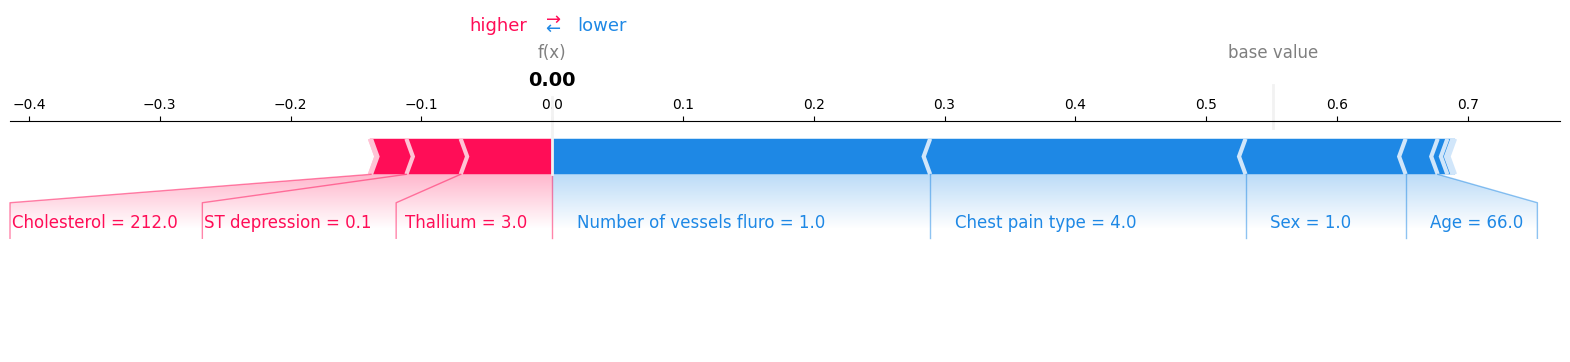

In [98]:
i = 26
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.iloc[i], matplotlib=True)

In [99]:
for i in range(50):
  if(y_test.iloc[i] == 1 and pred_tree[i] == 1):
    print(i, end = " ")

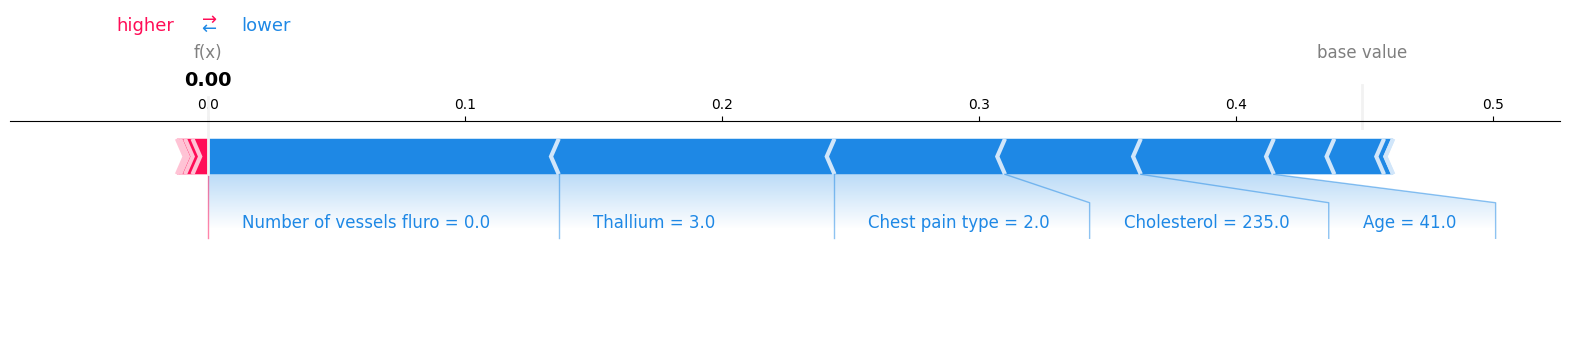

In [100]:
i = 24
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[i], matplotlib=True)

In [101]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:500])

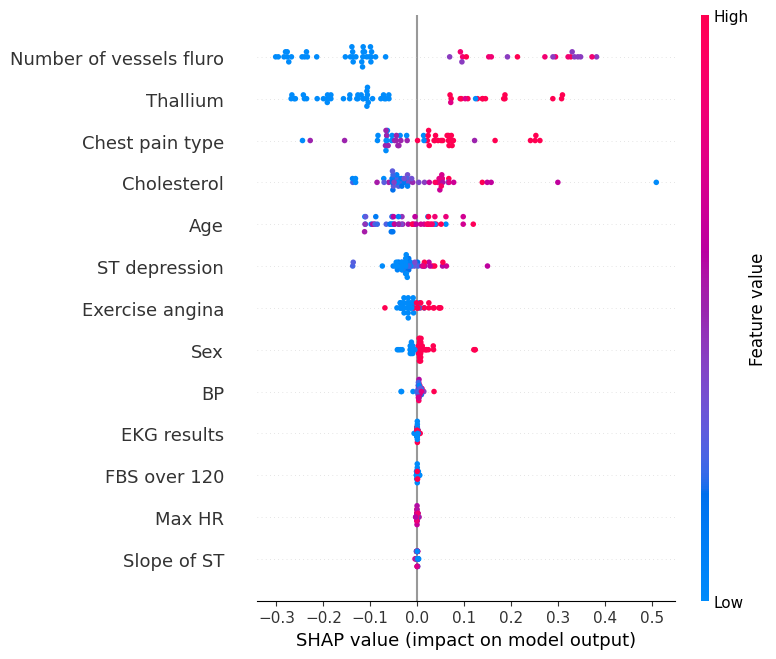

In [102]:
shap.summary_plot(shap_values[1], X_test.iloc[:500])

Variable Importance Plot - Global Interpretation


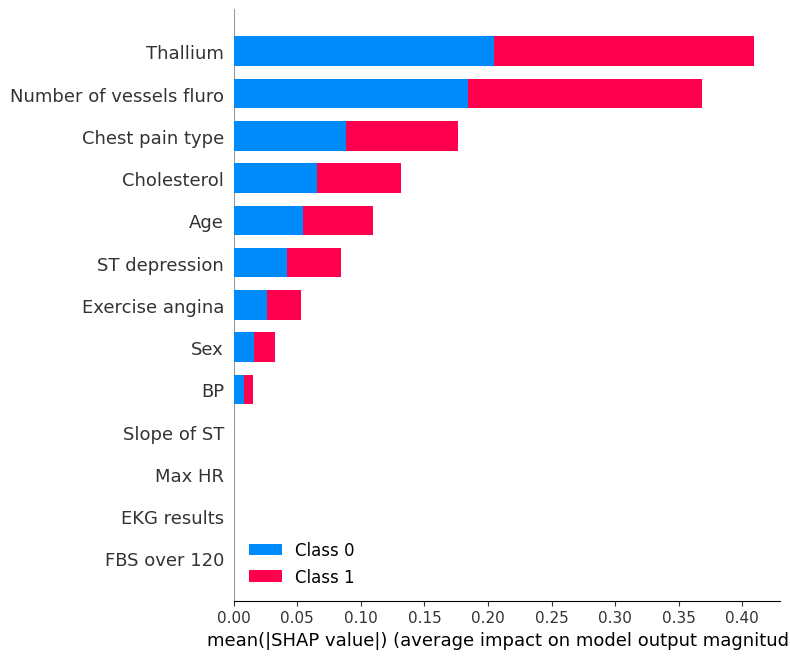

In [103]:
#Using decision Tree model
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(dtree)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


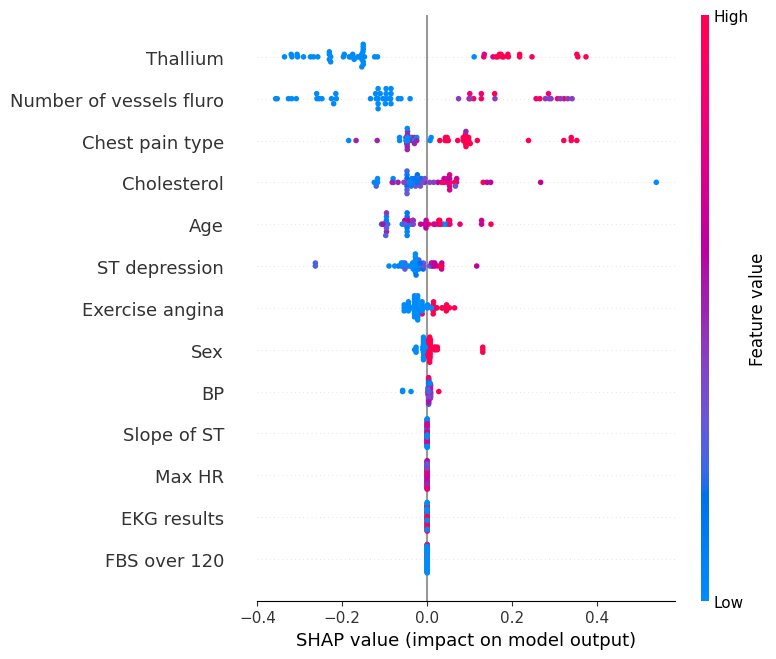

In [104]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

Variable Importance Plot - Global Interpretation


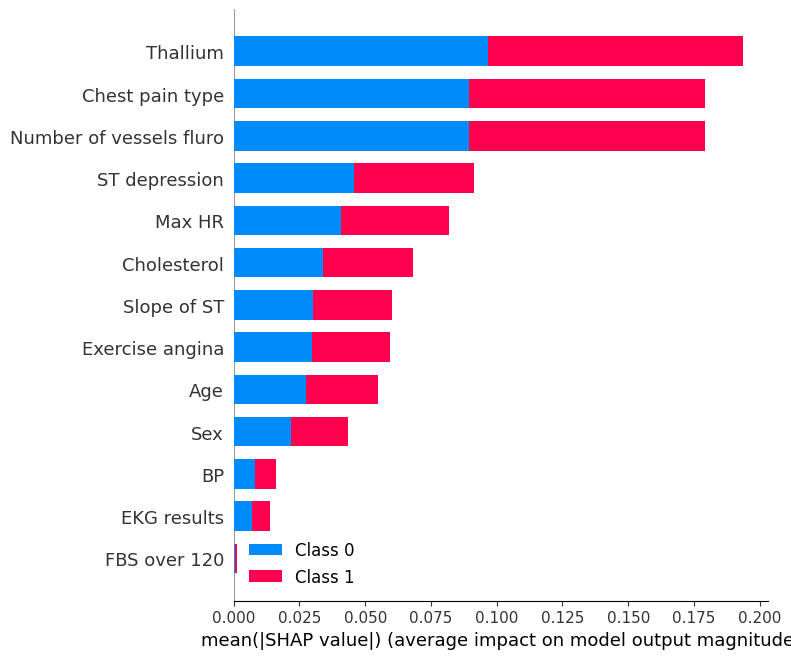

In [105]:
#Using Random Forest model
# Create the explainer
explainer1 = shap.TreeExplainer(rf_classifier)

shap_values1 = explainer1.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values1, X_test)


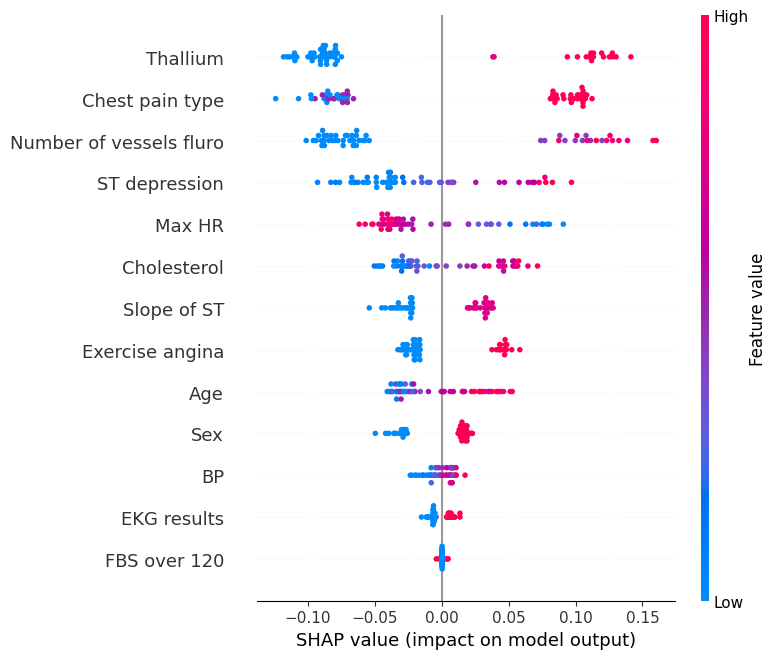

In [106]:
shap.summary_plot(shap_values1[1], X_test)

In [107]:
feature_importances = dtree.feature_importances_

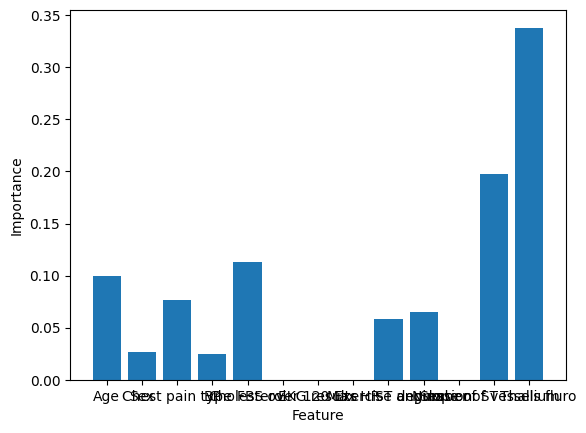

In [108]:
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [109]:
#Importing LIME
import lime
from lime import lime_tabular

In [110]:
from interpret.blackbox import LimeTabular
from lime.lime_tabular import LimeTabularExplainer
from interpret import show
import pipeline

In [111]:
X_train_df = pd.DataFrame(X_train, columns=["Age","Sex","Chest pain type","BP","Cholesterol","FBS over 120","EKG results","Max HR","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium"])

In [112]:
X_test_df = pd.DataFrame(X_test, columns=["Age","Sex","Chest pain type","BP","Cholesterol","FBS over 120","EKG results","Max HR","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium"])

In [113]:
X_train.shape

(216, 13)

In [114]:
X.shape

(270, 13)

In [115]:
explainer = LimeTabularExplainer(training_data=X_train.values,
                                 mode="classification",
                                 feature_names=list(X.columns),
                                 class_names=["Absence", "Presence"],
                                 discretize_continuous=True,
                                 random_state=1)

In [116]:
predict_fn = lambda x: dtree.predict_proba(x)

In [117]:
explanation = explainer.explain_instance(X_test_df.iloc[0], predict_fn, top_labels=1)

In [118]:
explanation.show_in_notebook()

In [119]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance = [(70,0,4,110,230,1,1,140,0,3.2,2,0,7)]

In [120]:
X_instance_array = np.array(X_instance)

# Reshape the NumPy array
X_instance_array = X_instance_array[np.newaxis, :]
X_instance_array = X_instance_array.reshape(1, -1)
# Get the model's prediction
prediction = dtree.predict(X_instance_array)[0]

In [121]:
predict_fn = lambda x: dtree.predict_proba(X_instance_array)

In [122]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array[0], dtree.predict_proba, top_labels=1)

In [123]:
explanation1.show_in_notebook()


In [126]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance1 = [(56,0,2,140,294,0,2,153,0,1.3,2,0,3)]

In [127]:
X_instance_array1 = np.array(X_instance1)

# Reshape the NumPy array
X_instance_array1 = X_instance_array1[np.newaxis, :]
X_instance_array1 = X_instance_array1.reshape(1, -1)
# Get the model's prediction
prediction = dtree.predict(X_instance_array1)[0]

In [128]:
predict_fn = lambda x: dtree.predict_proba(X_instance_array1)

In [129]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array1[0], dtree.predict_proba, top_labels=1)
explanation1.show_in_notebook()